In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# import datasets
mass_results = pd.read_csv('mass_results.csv')
mass_results = mass_results.dropna().sort_values(by=['recording']).reset_index(drop=True)

In [3]:
# preview the data
mass_results.head()

,recording,object,mass,result,line_pair_1,line_pair_2,line_pair_3,line_pair_4,line_pair_5
0,1,small,18,pass,110.320326,135.824364,177.809221,131.535798,137.757060
1,2,small,18,pass,105.365589,131.358679,148.441774,141.477263,134.106593
2,3,small,18,pass,105.337515,131.501001,161.261984,141.512303,134.857544
3,4,medium,18,pass,110.220289,134.632855,157.828448,137.038248,129.874043
4,5,medium,18,pass,109.507040,133.908032,154.732961,135.742481,132.175272


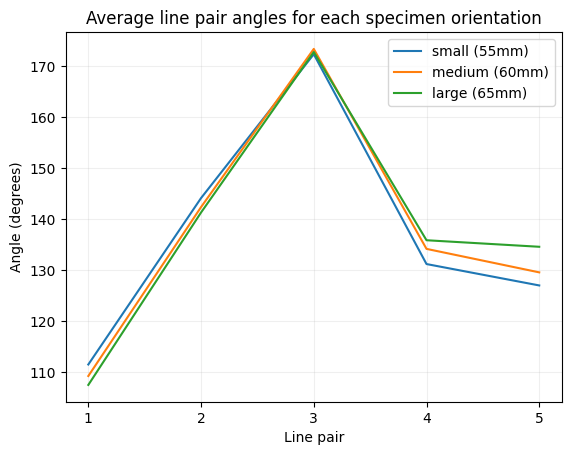

In [4]:
# average the angles for each object
average_angles = mass_results.groupby('object').mean([line_pair for line_pair in mass_results.columns if 'line' in line_pair])
average_angles = average_angles.drop(columns=['recording', 'mass'])
x = average_angles.columns
y = average_angles.values

# lookup dict fir labelling the plot
objects = { 
    0: 'small (55mm)',
    1: 'medium (60mm)',
    2: 'large (65mm)'
}

# plot the data
for i in range(len(y)):
    plt.plot(x, y[i], label=f'{objects[i]}')

# format the plot
plt.legend()
plt.xticks(labels=['1', '2', '3', '4', '5'], ticks=['line_pair_1', 'line_pair_2', 'line_pair_3', 'line_pair_4', 'line_pair_5'])
plt.xlabel('Line pair')
plt.ylabel('Angle (degrees)')
plt.grid(alpha=0.2)
plt.title('Average line pair angles for each specimen orientation')

plt.savefig('avg_line_pair_angles.png', bbox_inches='tight', dpi=600)

plt.show()

In [5]:
# copy the data
mass_results_avg = mass_results.copy()

# averate the angles for each object and mass
mass_results_avg = mass_results_avg.groupby(['object', 'mass']).mean(['line_pair_1', 'line_pair_2', 'line_pair_3', 'line_pair_4', 'line_pair_5'])
mass_results_avg.drop(columns=['recording'], inplace=True)
mass_results_avg.reset_index(inplace=True)

mass_results_avg

,object,mass,line_pair_1,line_pair_2,line_pair_3,line_pair_4,line_pair_5
0,large,18,110.013801,143.465038,155.722128,125.447281,116.690573
1,large,32,110.235108,150.025713,176.288588,128.181943,125.375853
2,large,49,111.195142,140.185430,174.765956,131.634334,128.307243
3,large,60,113.094787,145.439109,176.277434,135.090022,131.602312
4,medium,18,109.268976,134.400370,157.984185,136.279399,131.322263
5,medium,32,109.302393,147.080179,177.856384,131.808797,125.544352
6,medium,49,110.253151,143.094569,176.705734,130.278886,130.925385
7,medium,60,108.430668,143.153060,176.190738,137.226513,129.818505
8,medium,63,108.808799,144.051962,178.198725,135.178912,130.123399
9,small,18,107.007810,132.894681,162.504326,138.175121,135.573733


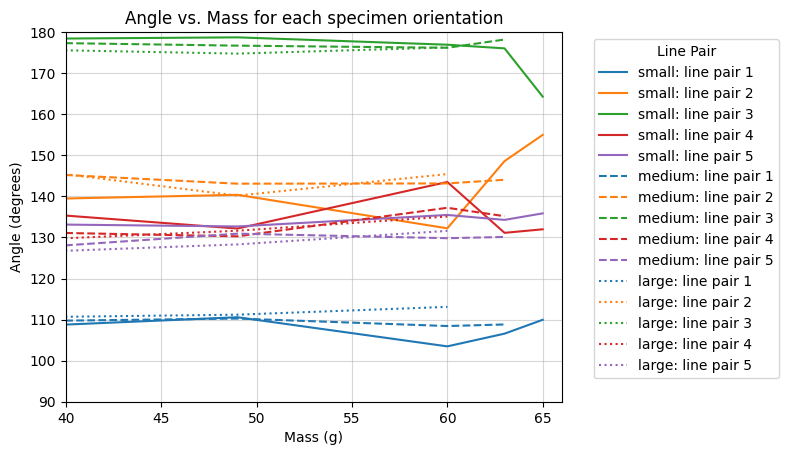

In [6]:
fig, ax = plt.subplots()

def plot_mass_results(data, object):
    ax.set_xlim(40, 66)
    ax.set_ylim(90, 180)
    # for the subset of data where object=='small', plot mass on x axis, angle on y axis, and color code by line pair
    data = data[data['object'] == object]
    colors = {
        'line_pair_1': 'tab:blue',
        'line_pair_2': 'tab:orange',
        'line_pair_3': 'tab:green',
        'line_pair_4': 'tab:red',
        'line_pair_5': 'tab:purple'
    }

    # Set the linestyle for the plot depending on the object with a switch case
    match(object):
        case 'small':
            linestyle = '-'
        case 'medium':
            linestyle = '--'
        case 'large':
            linestyle = ':'

    for line_pair in ['line_pair_1', 'line_pair_2', 'line_pair_3', 'line_pair_4', 'line_pair_5']:
        plt.plot(data['mass'], data[line_pair],
                 label=object + ': ' + ' '.join(line_pair.split('_')), linestyle=linestyle, color=colors[line_pair])
        
    ax.legend(title='Line Pair', bbox_to_anchor=(1.05, 1), loc='upper left')
    
# Set the x-axis and y-axis labels
ax.set_xlabel('Mass (g)')
ax.set_ylabel('Angle (degrees)')
ax.set_title(f'Angle vs. Mass for each specimen orientation')
ax.grid(alpha=0.5)

for object in ['small', 'medium', 'large']:
    plot_mass_results(mass_results_avg, object)

# Export the plot as a PNG
plt.savefig('mass_vs_angle.png', bbox_inches='tight', dpi=600)

# Display the plots
plt.show()
